<a href="https://colab.research.google.com/github/visith1577/Machine-learning-first-projects/blob/main/ANN_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
MNIST = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = MNIST.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train = x_train.reshape(-1, 28*28).astype('float32')/ 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32')/ 255.0

In [10]:
#using functional API

inputs = tf.keras.Input(shape=(784))
x = tf.keras.layers.Dense(512, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [12]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

In [14]:
history = model.fit(x_train, y_train, batch_size=32, epochs= 10, verbose=2)

Epoch 1/10
1875/1875 - 10s - loss: 0.1968 - accuracy: 0.9405
Epoch 2/10
1875/1875 - 9s - loss: 0.0883 - accuracy: 0.9727
Epoch 3/10
1875/1875 - 9s - loss: 0.0625 - accuracy: 0.9808
Epoch 4/10
1875/1875 - 9s - loss: 0.0503 - accuracy: 0.9843
Epoch 5/10
1875/1875 - 9s - loss: 0.0377 - accuracy: 0.9875
Epoch 6/10
1875/1875 - 9s - loss: 0.0327 - accuracy: 0.9895
Epoch 7/10
1875/1875 - 9s - loss: 0.0272 - accuracy: 0.9912
Epoch 8/10
1875/1875 - 9s - loss: 0.0253 - accuracy: 0.9924
Epoch 9/10
1875/1875 - 9s - loss: 0.0225 - accuracy: 0.9934
Epoch 10/10
1875/1875 - 9s - loss: 0.0211 - accuracy: 0.9934


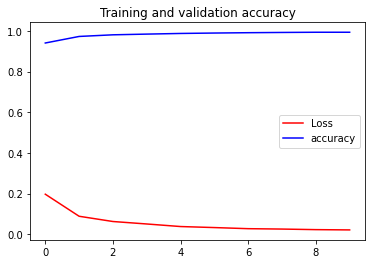

<Figure size 432x288 with 0 Axes>

In [19]:
loss = history.history['loss']
accuracy = history.history['accuracy']

epoch = range(len(accuracy))

plt.plot(epoch,loss, 'r', label='Loss')
plt.plot(epoch,accuracy, 'b', label='accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()